In [18]:
import pandas as pd
import random
from scipy.spatial.distance import cosine
import scipy
import scipy.stats
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms 
import numpy as np 


In [19]:
file = pd.read_csv("file3.csv")
t = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
matrix = t.fit_transform(file['description'].values.astype('U'))
cos = linear_kernel(matrix, matrix)
results = {}
for index, row in file.iterrows():
    sim = cos[index].argsort()[:-100:-1]
    items = [(cos[index][i],file['item_id'][i]) for i in sim]
    results[row['item_id']] = items    

In [20]:
def item(id):
    return ds.loc[ds['id'] == id]['description'].tolist()[0].split(' - ')[0]

def contentrecommend(item_id, num): 
    suggestion=[]
    res=[]
    recs = results[item_id][:num+1]
    for rec in recs:
        if ((rec[1]))!=item_id:
            suggestion.append([((rec[1])),((rec[0]))])
            res.append(rec[1])
    print("User ID should look at Items" + str(res))
    return suggestion

result=contentrecommend('item13', 19)


User ID should look at Items['item15', 'item9', 'item3', 'item2', 'item8', 'item4', 'item6', 'item11', 'item16', 'item10', 'item19', 'item14', 'item1', 'item17', 'item5', 'item18', 'item12', 'item7', 'item0']


User ID should look at Items['item15', 'item9', 'item3', 'item2', 'item8', 'item4', 'item6', 'item11', 'item16', 'item10', 'item19', 'item14', 'item1', 'item17', 'item5', 'item18', 'item12', 'item7', 'item0']


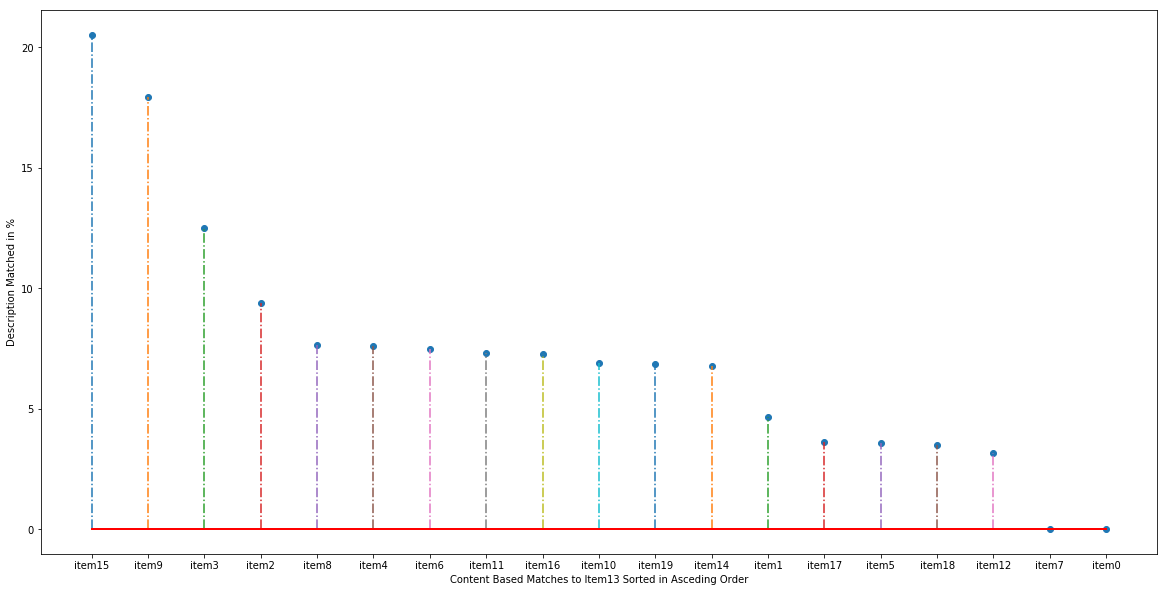

In [22]:
s=[]
f=[]
my_ticks=[]
plt.figure(figsize=(20,10))
result=contentrecommend('item13', 19)
for i in range(len(result)):
    s.append(i)
    my_ticks.append(result[i][0])
    percentage=result[i][1]*100
    f.append(percentage)
plt.xticks(s, my_ticks)
plt.xlabel('Content Based Matches to Item13 Sorted in Asceding Order', fontdict=None, labelpad=None)
plt.label('Keyword Matched in %', fontdict=None, labelpad=None)
markerline, stemlines, baseline = plt.stem(s, f, '-.')
plt.setp(baseline, color='r', linewidth=2)
plt.show()